# Emotionally Aware Chatbot (EDAIC)
Emotion is one of the basic instincts of a human being. Emotion detection plays a vital role in the field of textual analysis. At present, people’s expressions and emotional states have turned into the leading topic for research works. Emotion Detection and Recognition from texts are recent fields of research that are closely related to Emotion Analysis. Emotion Analysis aims at detecting and recognizing feelings through the expressions from sentences, such as *anger*, *surprise*, *joy*, *fear*, *sadness*, *love*, *neutral* etc.

**Course No:** CSE4250

**Course Name:** Project & Thesis II

**Supervisor**


*   Md Khairul Hasan



**Team Members**

*   160204107 - Nowshin Rumali
*   170104061 - Amin Ahmed Toshib
*   170104116 - Rejone-E-Rasul Hridoy
*   170104118 - Mehedi Hasan Sami




In [ ]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Text Libraries
import nltk 
import string
import re

# Feature Extraction Libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

# Classifier Model libraries
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.neural_network import MLPClassifier

# Performance Matrix libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# other
import pickle
import os
import warnings
warnings.filterwarnings("ignore")

# Drive Mount
from google.colab import drive
drive.mount('/content/drive')
root_path = "/content/drive/MyDrive/CSE/4.1/CSE4100 - Project & Thesis-I/Emotion Detection Chatbot Papers/4.2/"
resource_root_path = "/content/drive/MyDrive/CSE/4.2/CSE4238 - Soft Computing Lab/Project - Emotion Detection from Twitter Text/"

Mounted at /content/drive


# 1. Dataset

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/CSE/4.2/CSE4214 - Pattern Recognition Lab/Project/text_emotions.csv')
df = pd.read_csv(root_path+'text_emotions_neutral.csv')
df

,content,sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
24995,Yeah. Did you know that in Nevada there is a...,Neutral
24996,"I wonder why, not many have had facial hair a...",Neutral
24997,"That is sad, it is bad that we really wind up...",Neutral
24998,Same here. Since 1900 the taller candidate h...,Neutral


In [ ]:
print('Dataset size:',df.shape)
print('Columns are:',df.columns)
Y = df['sentiment']

Dataset size: (25000, 2)
Columns are: Index(['content', 'sentiment'], dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    25000 non-null  object
 1   sentiment  25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB


## Dataset Emotion Analysis

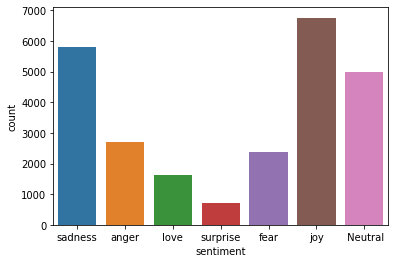

In [ ]:
sns.countplot(x = 'sentiment', data = df)

## Emotion Frequency 

In [ ]:
import collections
counter=collections.Counter(df['sentiment'])
counter

Counter({' Neutral': 5000,
         'anger': 2709,
         'fear': 2373,
         'joy': 6760,
         'love': 1641,
         'sadness': 5798,
         'surprise': 719})

In [ ]:
Emotions = df['sentiment'].unique()
Emotions

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy', ' Neutral'],
      dtype=object)

# 2. Pre-processing text data
1. Remove punctuations
2. Tokenization - Converting a sentence into list of words
3. Remove stopwords
4. Lammetization/stemming - Tranforming any form of a word to its root word

## 2.1 Remove Punctuations

In [ ]:
emojis = pd.read_csv(resource_root_path+'emojis.txt',sep=',',header=None)
emojis_dict = {i:j for i,j in zip(emojis[0],emojis[1])}
pattern = '|'.join(sorted(re.escape(k) for k in emojis_dict))

def replace_emojis(text):
    text = re.sub(pattern,lambda m: emojis_dict.get(m.group(0)), text, flags=re.IGNORECASE)
    return text

def remove_punct(text):
    text = replace_emojis(text)
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['Tweet_punct'] = df['content'].apply(lambda x: remove_punct(x))
df.head(10)

,content,sentiment,Tweet_punct
0,i didnt feel humiliated,sadness,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,anger,i am feeling grouchy
5,ive been feeling a little burdened lately wasn...,sadness,ive been feeling a little burdened lately wasn...
6,ive been taking or milligrams or times recomme...,surprise,ive been taking or milligrams or times recomme...
7,i feel as confused about life as a teenager or...,fear,i feel as confused about life as a teenager or...
8,i have been with petronas for years i feel tha...,joy,i have been with petronas for years i feel tha...
9,i feel romantic too,love,i feel romantic too


## 2.2 Tokenization

In [ ]:
def tokenization(text):
    text = text.lower()
    text = re.split('\W+', text)
    
    return text

df['Tweet_tokenized'] = df['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df.head(10)

,content,sentiment,Tweet_punct,Tweet_tokenized
0,i didnt feel humiliated,sadness,i didnt feel humiliated,"[i, didnt, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ..."
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong,"[im, grabbing, a, minute, to, post, i, feel, g..."
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...,"[i, am, ever, feeling, nostalgic, about, the, ..."
4,i am feeling grouchy,anger,i am feeling grouchy,"[i, am, feeling, grouchy]"
5,ive been feeling a little burdened lately wasn...,sadness,ive been feeling a little burdened lately wasn...,"[ive, been, feeling, a, little, burdened, late..."
6,ive been taking or milligrams or times recomme...,surprise,ive been taking or milligrams or times recomme...,"[ive, been, taking, or, milligrams, or, times,..."
7,i feel as confused about life as a teenager or...,fear,i feel as confused about life as a teenager or...,"[i, feel, as, confused, about, life, as, a, te..."
8,i have been with petronas for years i feel tha...,joy,i have been with petronas for years i feel tha...,"[i, have, been, with, petronas, for, years, i,..."
9,i feel romantic too,love,i feel romantic too,"[i, feel, romantic, too]"


## 2.3 Remove Stopwords

In [ ]:
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
stopword.extend(['yr', 'year', 'woman', 'man', 'girl','boy','one', 'two', 'sixteen', 'yearold', 'fu', 'weeks', 'week',
              'treatment', 'associated', 'patients', 'may','day', 'case','old','u','n','didnt','ive','ate','feel','keep'
                ,'brother','dad','basic','im',''])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df.head(10)

,content,sentiment,Tweet_punct,Tweet_tokenized,Tweet_nonstop
0,i didnt feel humiliated,sadness,i didnt feel humiliated,"[i, didnt, feel, humiliated]",[humiliated]
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ...","[go, feeling, hopeless, damned, hopeful, aroun..."
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong,"[im, grabbing, a, minute, to, post, i, feel, g...","[grabbing, minute, post, greedy, wrong]"
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...,"[i, am, ever, feeling, nostalgic, about, the, ...","[ever, feeling, nostalgic, fireplace, know, st..."
4,i am feeling grouchy,anger,i am feeling grouchy,"[i, am, feeling, grouchy]","[feeling, grouchy]"
5,ive been feeling a little burdened lately wasn...,sadness,ive been feeling a little burdened lately wasn...,"[ive, been, feeling, a, little, burdened, late...","[feeling, little, burdened, lately, wasnt, sure]"
6,ive been taking or milligrams or times recomme...,surprise,ive been taking or milligrams or times recomme...,"[ive, been, taking, or, milligrams, or, times,...","[taking, milligrams, times, recommended, amoun..."
7,i feel as confused about life as a teenager or...,fear,i feel as confused about life as a teenager or...,"[i, feel, as, confused, about, life, as, a, te...","[confused, life, teenager, jaded]"
8,i have been with petronas for years i feel tha...,joy,i have been with petronas for years i feel tha...,"[i, have, been, with, petronas, for, years, i,...","[petronas, years, petronas, performed, well, m..."
9,i feel romantic too,love,i feel romantic too,"[i, feel, romantic, too]",[romantic]


## 2.4 Lemmatization

In [ ]:
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['Tweet_lemmatized'] = df['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,content,sentiment,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_lemmatized
0,i didnt feel humiliated,sadness,i didnt feel humiliated,"[i, didnt, feel, humiliated]",[humiliated],[humiliated]
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ...","[go, feeling, hopeless, damned, hopeful, aroun...","[go, feeling, hopeless, damned, hopeful, aroun..."
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong,"[im, grabbing, a, minute, to, post, i, feel, g...","[grabbing, minute, post, greedy, wrong]","[grabbing, minute, post, greedy, wrong]"
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...,"[i, am, ever, feeling, nostalgic, about, the, ...","[ever, feeling, nostalgic, fireplace, know, st...","[ever, feeling, nostalgic, fireplace, know, st..."
4,i am feeling grouchy,anger,i am feeling grouchy,"[i, am, feeling, grouchy]","[feeling, grouchy]","[feeling, grouchy]"


## Token Frequency in a sentence after preprocessing

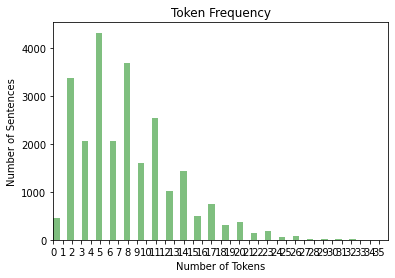

In [ ]:
token_lengths = [len(t) for t in df['Tweet_lemmatized']]
plt.hist(token_lengths,bins=33,width = 0.7, fc="green",alpha=0.5)
plt.xlabel('Number of Tokens')
plt.ylabel('Number of Sentences')
plt.title('Token Frequency')
x_Values = [i for i in range(36)] 
plt.xticks(x_Values)
plt.xlim(0,36)
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

## All in one (Text preprocessing)

In [ ]:
def clean_text(text):
    text = remove_punct(text)
    text = tokenization(text)
    text = remove_stopwords(text)
    text = lemmatizer(text)
    return text

# 3. Feature Extraction
1. Count Vectorizer
2. TF-IDF (Term Frequency and Inverse Document Frequency)

## 3.1 Count Vectorizer
**CountVectorizer** is a great tool provided by the *scikit-learn* library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. This is helpful when we have multiple such texts, and we wish to convert each word in each text into vectors (for using in further text analysis).
    
Let us consider a few sample texts from a document:
    
    document 1: Time flies flies like an arrow.
    document 2: Fruit flies like a banana.

    
**CountVectorizer** creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample. 

Vocabulary:  {'time': 6, 'flies': 3, 'like': 5, 'an': 0, 'arrow': 1, 'fruit': 4, 'banana': 2}
Encoded Document is:
[[1 1 0 2 0 1 1]
 [0 0 1 1 1 1 0]]
['an', 'arrow', 'banana', 'flies', 'fruit', 'like', 'time']


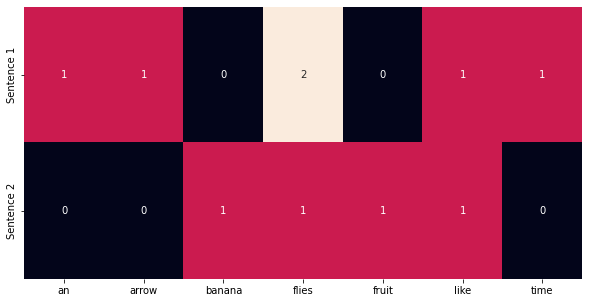

In [ ]:
document = ["Time flies flies like an arrow",
            "Fruit flies like a banana"]
  
# Create a Vectorizer Object
vectorizer = CountVectorizer()
  
vectorizer.fit(document)
  
# Printing the identified Unique words along with their indices
print("Vocabulary: ", vectorizer.vocabulary_)
  
# Encode the Document
vector = vectorizer.transform(document)
  
# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vector.toarray())

dictionary = sorted(vectorizer.vocabulary_)

print(dictionary)

sns.heatmap(vector.toarray(), annot=True, cbar=False, xticklabels=dictionary,
                                             yticklabels=['Sentence 1','Sentence 2'])

## 3.2 TF-IDF

### 3.2.1 **Term Frequency (TF)**
Term Frequent (**TF**) is a measure of how frequently a term, $t$, appears in a document, $d$:



$$TF_{t,d} = \frac{n_{t,d}}{\text{Total number of terms in document}\ d }$$



$n_{t,d}$ = Number of times term $t$ appears in a document $d$. Thus, each document and term would have its own **TF** value.

Consider these 3 documents:- 

- It was the best of the time.
- it was the worst of Times.
- it is the time of stupidity.

The vocabulary or dictionary of the entire corpus would be:- 

1. it
2. was
3. the 
4. best
5. of
6. time
7. worst
8. is
9. stupidity

Now we will calculate the **TF** values for the **Document 3**. 

Document 3 :- **it is the time of stupidity.**

- Number of words in Document 3 = **6**
- TF for the word **‘the’** = (number of times **‘the’** appears in Document 3) / (number of terms in Document 3) = **1/6**

Likewise:- 

- TF(**'it'**) = 1/6
- TF(**'was'**) = 0/6 = 0
- TF(**'the'**) = 1/6 
- TF(**'best'**) = 0/6 = 0
- TF(**'of'**) = 1/6 
- TF(**'time'**) = 1/6
- TF(**'worst'**) = 0/6 = 0
- TF(**'is'**) = 1/6
- TF(**'stupidity'**) = 1/6

We can calculate all the term frequencies for all the terms of all the documents in this manner:-

|    Term   | Document#1 | Document#2 | Document#3 | TF (Document#1) | TF (Document#2) | TF (Document#3) |
|:---------:|:----------:|:----------:|:----------:|:---------------:|:---------------:|:---------------:|
|     it    |      1     |      1     |      1     |       1/7       |       1/6       |       1/6       |
|    was    |      1     |      1     |      0     |       1/7       |       1/6       |        0        |
|    the    |      2     |      1     |      1     |       2/7       |       1/6       |       1/6       |
|    best   |      1     |      0     |      0     |       1/7       |        0        |        0        |
|     of    |      1     |      1     |      1     |       1/7       |       1/6       |       1/6       |
|    time   |      1     |      1     |      1     |       1/7       |       1/6       |       1/6       |
|   worst   |      0     |      1     |      0     |        0        |       1/6       |        0        |
|    is     |      0     |      0     |      1     |        0        |        0        |       1/6       |
| stupidity |      0     |      0     |      1     |        0        |        0        |       1/6       |







### 3.2.2 **Inverse Document Frequency (IDF)**

IDF is a measure of how important a term is. We need the IDF value because computing just the **TF alone is not sufficient** to understand the importance of words:



$$IDF_{t} = log \ (\frac{\text{Total Number of Documents}}{\text{The Number of Documents with Term $t$}})$$



A problem with scoring word frequency is that highly frequent words **(‘is’, ‘the’, ‘a’ etc)** start to dominate in the document (e.g. larger score), but may not contain as much **“useful information”** to the model comapre to the rarer but **domain specific words**.


One approach is to rescale the frequency of words by **how often they appear in all documents**, so that the scores for frequent words like “the” that are also frequent **across all documents are penalized**.

This approach to scoring is called Term Frequency – Inverse Document Frequency, or TF-IDF for short, where:

- **Term Frequency:** is a scoring of the frequency of the word in the current document.
- **Inverse Document Frequency:** is a scoring of how rare the word is across documents.

**Thus the idf of a rare term is high, whereas the idf of a frequent term is likely to be low.**

We can calculate the IDF values for **Document 3**:

Document 3 :- **it is the time of stupidity.**

IDF(**‘it’**) =  log(total number of documents/number of documents containing the word **‘it’**) = log(3/3) = log(1) = 0

IDF(**‘stupidity’**) =  log(total number of documents/number of documents containing the word **‘stupidity’**) = log(3/1) = log(3) = 0.48

We can calculate the IDF values for each word like this. Thus, the IDF values for the entire vocabulary would be:

|    Term   | Document#1 | Document#2 | Document#3 |  IDF |
|:---------:|:----------:|:----------:|:----------:|:----:|
|     it    |      1     |      1     |      1     | 0.00 |
|    was    |      1     |      1     |      0     | 0.18 |
|    the    |      2     |      1     |      1     | 0.00 |
|    best   |      1     |      0     |      0     | 0.48 |
|     of    |      1     |      1     |      1     | 0.00 |
|    time   |      1     |      1     |      1     | 0.00 |
|   worst   |      0     |      1     |      0     | 0.48 |
|    is     |      0     |      0     |      1     | 0.48 |
| stupidity |      0     |      0     |      1     | 0.48 |

\

We can now compute the TF-IDF score for each word in the corpus. Words with a higher score are more important, and those with a lower score are less important:

$$(TF-IDF)_{t,d} = TF_{t,d} * IDF_{t}$$


You can find the overall summary in the following figure.

<div align="center">
<img src="https://drive.google.com/uc?id=1Xw5RlK_RxYtZEQtpFNaePXnJNyQmLcn1" width="680" height="230">
</div>



We can now calculate the TF-IDF score for every word in **Document 3**:

Document 3 :- **it is the time of stupidity.**

TF-IDF(‘it’, Document 3) = TF(‘it’, Document 3) * IDF(‘it’) = 1/6 * 0 = 0

Likewise:- 

- TF(**'it'**) = (1/6) * 0 = 0
- TF(**'is'**) = (1/6) * 0.48 = 0.08
- TF(**'the'**) = (1/6) * 0 = 0
- TF(**'best'**) = (0/6) * 0.48 = 0
- TF(**'time'**) = (1/6) * 0 = 0
- TF(**'of'**) = (1/6) * 0 = 0
- TF(**'stupidity'**) = (1/6) * 0.48 = 0.08

Similarly, we can calculate the TF-IDF scores for all the words with respect to all the documents.

- First, notice how if there is a very common
word that occurs in all documents (i.e., n = N), IDF(w) is 0 and the TF­IDF score is 0, thereby
completely penalizing that term. 
- Second, if a term occurs very rarely, perhaps in only one document,
the IDF will be the maximum possible value, log N


[[0.42519636 0.42519636 0.         0.60506143 0.         0.30253071
  0.42519636]
 [0.         0.         0.57615236 0.40993715 0.57615236 0.40993715
  0.        ]]
{'time': 6, 'flies': 3, 'like': 5, 'an': 0, 'arrow': 1, 'fruit': 4, 'banana': 2}
['an', 'arrow', 'banana', 'flies', 'fruit', 'like', 'time']


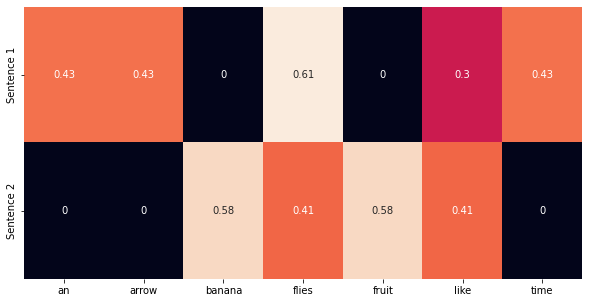

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

document = ['Time flies flies like an arrow.',
          'Fruit flies like a banana.']

tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(document).toarray()

print (tfidf)

print (tfidf_vectorizer.vocabulary_)

dictionary = sorted(tfidf_vectorizer.vocabulary_)

print(dictionary)

sns.heatmap(tfidf, annot=True, cbar=False, xticklabels=dictionary,
                                           yticklabels=['Sentence 1','Sentence 2'])

### Applying Feature Extraction in tweet dataset

#### Train Test Split (70-30)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['sentiment'],test_size=0.3, random_state = 116)

In [ ]:
countVectorizer1 = CountVectorizer(analyzer=clean_text)
countVector1 = countVectorizer1.fit_transform(X_train)

countVector2 = countVectorizer1.transform(X_test)

tfidf_transformer_xtrain = TfidfTransformer()
x_train = tfidf_transformer_xtrain.fit_transform(countVector1)

tfidf_transformer_xtest = TfidfTransformer()
x_test = tfidf_transformer_xtest.fit_transform(countVector2)

# 4. Models
1. Support Vector Machine (SVM)
2. Logistic Regression
3. Random Forest Classifier
4. XGBoost Classifier
5. Multinomial Naive Bayes
6. Decision Tree Classifier
7. Multilayer Perceptron



**Performance Matrix :**
1.   **Accuracy** = $\frac{\text{TP+TN}}{\text{TP+TN+FP+FN}}$
2.   **Precision** = $\frac{\text{TP}}{\text{TP+FP}}$ 
3.   **Recall** = $\frac{\text{TP}}{\text{TP+FN}}$ 
4.   **F1-score** = $\frac{\text{2*Precision*Recall}}{\text{Precision+Recall}}$ 

## 4.1 Support Vector Machine (SVM)

In [ ]:
svm = SGDClassifier()
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)

svm_acc = accuracy_score(y_pred, y_test)
svm_prec = precision_score(y_test, y_pred, average='macro')
svm_recal = recall_score(y_test, y_pred, average='macro')
svm_cm = confusion_matrix(y_test,y_pred)
svm_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(svm_acc*100))
print('Precision:', '{0:.3f}'.format(svm_prec*100))
print('Recall:', '{0:.3f}'.format(svm_recal*100))
print('F1-score:', '{0:.3f}'.format(svm_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 88.467
Precision: 86.953
Recall: 83.696
F1-score: 85.165
              precision    recall  f1-score   support

     Neutral       0.89      0.93      0.91      1482
       anger       0.89      0.85      0.87       805
        fear       0.86      0.82      0.84       709
         joy       0.89      0.91      0.90      2092
        love       0.82      0.75      0.79       481
     sadness       0.90      0.92      0.91      1725
    surprise       0.83      0.67      0.75       206

    accuracy                           0.88      7500
   macro avg       0.87      0.84      0.85      7500
weighted avg       0.88      0.88      0.88      7500



### 4.1.1 Confusion Matrix

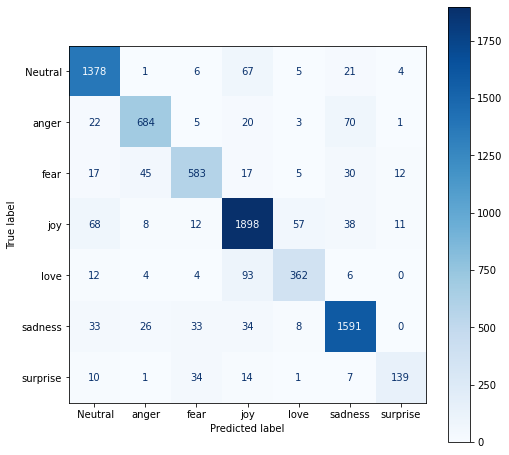

In [ ]:
cm_display_svm = ConfusionMatrixDisplay(svm_cm, display_labels=svm.classes_)
fig, ax = plt.subplots(figsize=(8,8)) # adjust the size
cm_display_svm.plot(ax=ax,cmap='Blues',values_format='')

## 4.2 Logistic Regression

In [ ]:
logisticRegr = LogisticRegression()

logisticRegr.fit(x_train, y_train)

y_pred = logisticRegr.predict(x_test)

lr_acc = accuracy_score(y_pred, y_test)
lr_prec = precision_score(y_test, y_pred, average='macro')
lr_recal = recall_score(y_test, y_pred, average='macro')
lr_cm = confusion_matrix(y_test,y_pred)
lr_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(lr_acc*100))
print('Precision:', '{0:.3f}'.format(lr_prec*100))
print('Recall:', '{0:.3f}'.format(lr_recal*100))
print('F1-score:', '{0:.3f}'.format(lr_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 86.120
Precision: 86.869
Recall: 77.936
F1-score: 81.328
              precision    recall  f1-score   support

     Neutral       0.87      0.92      0.89      1482
       anger       0.89      0.79      0.84       805
        fear       0.88      0.75      0.81       709
         joy       0.83      0.92      0.87      2092
        love       0.83      0.61      0.70       481
     sadness       0.88      0.92      0.90      1725
    surprise       0.90      0.53      0.67       206

    accuracy                           0.86      7500
   macro avg       0.87      0.78      0.81      7500
weighted avg       0.86      0.86      0.86      7500



### 4.2.1 Confusion Matrix

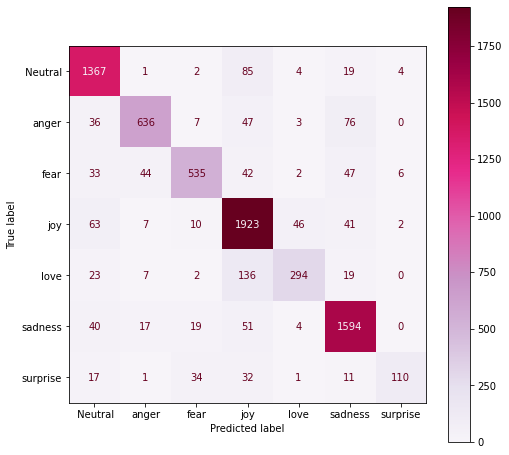

In [ ]:
cm_display_lr = ConfusionMatrixDisplay(lr_cm, display_labels=logisticRegr.classes_)
fig, ax = plt.subplots(figsize=(8,8)) # adjust the size
cm_display_lr.plot(ax=ax,cmap='PuRd',values_format='')

## 4.3 Random Forest Classifier

random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.

**Hyperparametes:**

**Increasing the predictive power**

Firstly, there is the **n_estimators** hyperparameter, which is just the number of trees the algorithm builds before taking the maximum voting or taking the averages of predictions. In general, a higher number of trees increases the performance and makes the predictions more stable, but it also slows down the computation.

Another important hyperparameter is **max_features**, which is the maximum number of features random forest considers to split a node. Sklearn provides several options, all described in the documentation.

The last important hyperparameter is **min_sample_leaf**. This determines the minimum number of leafs required to split an internal node.

[click for more](https://builtin.com/data-science/random-forest-algorithm)

In [ ]:
rfc = RandomForestClassifier(n_estimators=1, random_state=0)

rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)

rfc_acc = accuracy_score(y_pred, y_test)
rfc_prec = precision_score(y_test, y_pred, average='macro')
rfc_recal = recall_score(y_test, y_pred, average='macro')
rfc_cm = confusion_matrix(y_test,y_pred)
rfc_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(rfc_acc*100))
print('Precision:', '{0:.3f}'.format(rfc_prec*100))
print('Recall:', '{0:.3f}'.format(rfc_recal*100))
print('F1-score:', '{0:.3f}'.format(rfc_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 66.867
Precision: 63.918
Recall: 64.851
F1-score: 64.243
              precision    recall  f1-score   support

     Neutral       0.64      0.72      0.68      1482
       anger       0.60      0.65      0.63       805
        fear       0.68      0.69      0.69       709
         joy       0.74      0.63      0.68      2092
        love       0.56      0.53      0.54       481
     sadness       0.69      0.71      0.70      1725
    surprise       0.56      0.60      0.58       206

    accuracy                           0.67      7500
   macro avg       0.64      0.65      0.64      7500
weighted avg       0.67      0.67      0.67      7500



### 4.3.1 Confusion Matrix

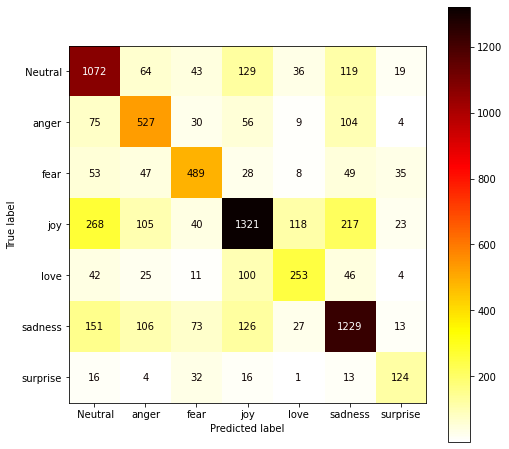

In [ ]:
cm_display_rfc = ConfusionMatrixDisplay(rfc_cm, display_labels=rfc.classes_)
fig, ax = plt.subplots(figsize=(8,8)) # adjust the size
cm_display_rfc.plot(ax=ax,cmap='hot_r',values_format='')

## 4.4 XGBoost Classifier

**XGBoost** is a decision-tree-based ensemble Machine Learning algorithm that uses a *gradient boosting framework*. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks. However, when it comes to small-to-medium structured/tabular data, decision tree based algorithms are considered best-in-class right now.


**Why does XGBoost perform so well?**

> XGBoost and Gradient Boosting Machines (GBMs) are both ensemble tree methods that apply the principle of boosting weak learners (CARTs generally) using the gradient descent architecture. However, XGBoost improves upon the base GBM framework through systems optimization and algorithmic enhancements.


[Click for more details](https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d)

In [ ]:
xgbc = XGBClassifier(max_depth=16, n_estimators=1000,nthread = 6)
xgbc.fit(x_train,y_train)
y_pred = xgbc.predict(x_test)

xgbc_acc = accuracy_score(y_pred, y_test)
xgbc_prec = precision_score(y_test, y_pred, average='macro')
xgbc_recal = recall_score(y_test, y_pred, average='macro')
xgbc_cm = confusion_matrix(y_test,y_pred)
xgbc_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(xgbc_acc*100))
print('Precision:', '{0:.3f}'.format(xgbc_prec*100))
print('Recall:', '{0:.3f}'.format(xgbc_recal*100))
print('F1-score:', '{0:.3f}'.format(xgbc_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 88.840
Precision: 85.440
Recall: 85.376
F1-score: 85.403
              precision    recall  f1-score   support

     Neutral       0.90      0.92      0.91      1482
       anger       0.88      0.87      0.88       805
        fear       0.86      0.83      0.85       709
         joy       0.90      0.90      0.90      2092
        love       0.78      0.80      0.79       481
     sadness       0.93      0.92      0.93      1725
    surprise       0.73      0.73      0.73       206

    accuracy                           0.89      7500
   macro avg       0.85      0.85      0.85      7500
weighted avg       0.89      0.89      0.89      7500



### 4.4.1 Confusion Matrix

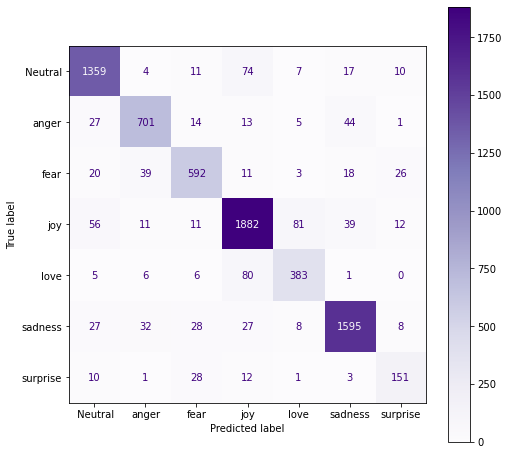

In [ ]:
cm_display_xgbc = ConfusionMatrixDisplay(xgbc_cm, display_labels=xgbc.classes_)
_, ax = plt.subplots(figsize=(8,8)) # adjust the size
cm_display_xgbc.plot(ax=ax,cmap='Purples',values_format='')

## 4.5 Multinomial Naive Bayes Classifier

In [ ]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

y_pred = mnb.predict(x_test)

mnb_acc = accuracy_score(y_pred, y_test)
mnb_prec = precision_score(y_test, y_pred, average='macro')
mnb_recal = recall_score(y_test, y_pred, average='macro')
mnb_cm = confusion_matrix(y_test,y_pred)
mnb_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(mnb_acc*100))
print('Precision:', '{0:.3f}'.format(mnb_prec*100))
print('Recall:', '{0:.3f}'.format(mnb_recal*100))
print('F1-score:', '{0:.3f}'.format(mnb_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 71.587
Precision: 85.389
Recall: 48.643
F1-score: 48.970
              precision    recall  f1-score   support

     Neutral       0.87      0.89      0.88      1482
       anger       0.90      0.32      0.47       805
        fear       0.92      0.25      0.39       709
         joy       0.64      0.96      0.76      2092
        love       0.97      0.07      0.13       481
     sadness       0.68      0.92      0.78      1725
    surprise       1.00      0.00      0.01       206

    accuracy                           0.72      7500
   macro avg       0.85      0.49      0.49      7500
weighted avg       0.78      0.72      0.66      7500



### 4.5.1 Confusion Matrix

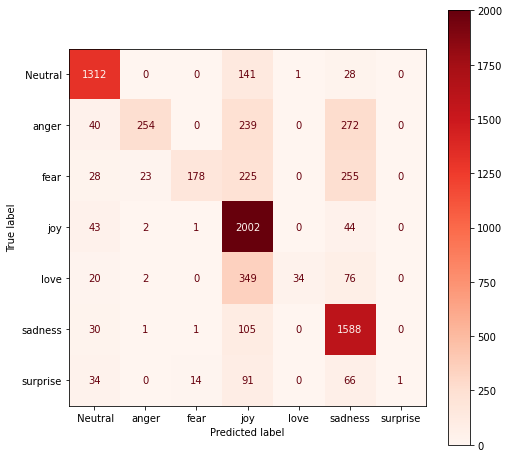

In [ ]:
cm_display_mnb = ConfusionMatrixDisplay(mnb_cm, display_labels=mnb.classes_)
fig, ax = plt.subplots(figsize=(8,8)) # adjust the size
cm_display_mnb.plot(ax=ax,cmap='Reds',values_format='')

## 4.6 Decision Tree Classifier

In [ ]:
dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)


dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_test, y_pred, average='macro')
dt_recal = recall_score(y_test, y_pred, average='macro')
dt_cm = confusion_matrix(y_test,y_pred)
dt_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(dt_acc*100))
print('Precision:', '{0:.3f}'.format(dt_prec*100))
print('Recall:', '{0:.3f}'.format(dt_recal*100))
print('F1-score:', '{0:.3f}'.format(dt_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 75.747
Precision: 74.294
Recall: 74.300
F1-score: 74.222
              precision    recall  f1-score   support

     Neutral       0.67      0.76      0.71      1482
       anger       0.80      0.77      0.79       805
        fear       0.75      0.73      0.74       709
         joy       0.78      0.73      0.75      2092
        love       0.73      0.70      0.72       481
     sadness       0.83      0.82      0.82      1725
    surprise       0.65      0.69      0.67       206

    accuracy                           0.76      7500
   macro avg       0.74      0.74      0.74      7500
weighted avg       0.76      0.76      0.76      7500



### 4.6.1 Confusion Matrix

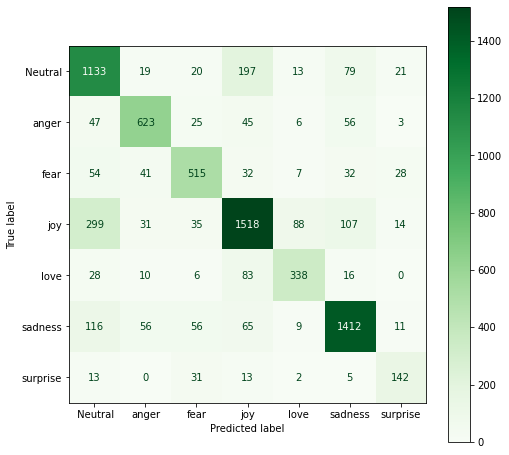

In [ ]:
cm_display_dt = ConfusionMatrixDisplay(dt_cm, display_labels=dt.classes_)
fig, ax = plt.subplots(figsize=(8,8)) # adjust the size
cm_display_dt.plot(ax=ax,cmap='Greens',values_format='')

# 4.7 Multi Layer Perceptron (MLP)

In [ ]:
mlp = MLPClassifier(random_state=5, max_iter=300)

mlp.fit(x_train, y_train)

y_pred = mlp.predict(x_test)

mlp_acc = accuracy_score(y_pred, y_test)
mlp_prec = precision_score(y_test, y_pred, average='macro')
mlp_recal = recall_score(y_test, y_pred, average='macro')
mlp_cm = confusion_matrix(y_test,y_pred)
mlp_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(mlp_acc*100))
print('Precision:', '{0:.3f}'.format(mlp_prec*100))
print('Recall:', '{0:.3f}'.format(mlp_recal*100))
print('F1-score:', '{0:.3f}'.format(mlp_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 85.307
Precision: 82.381
Recall: 81.091
F1-score: 81.682
              precision    recall  f1-score   support

     Neutral       0.86      0.91      0.88      1482
       anger       0.85      0.82      0.83       805
        fear       0.83      0.78      0.80       709
         joy       0.88      0.85      0.86      2092
        love       0.72      0.73      0.72       481
     sadness       0.87      0.91      0.89      1725
    surprise       0.75      0.68      0.72       206

    accuracy                           0.85      7500
   macro avg       0.82      0.81      0.82      7500
weighted avg       0.85      0.85      0.85      7500



### 4.7.1 Confusion Matrix

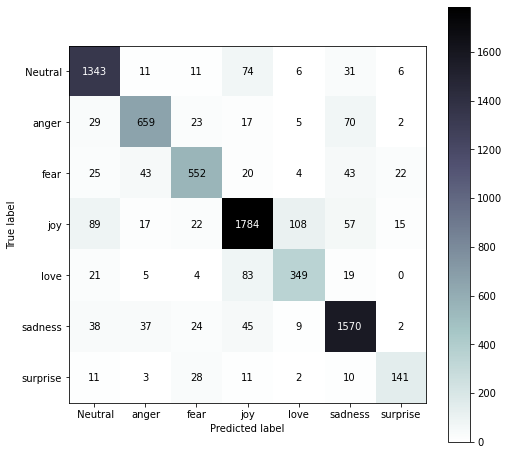

In [ ]:
cm_display_mlp = ConfusionMatrixDisplay(mlp_cm, display_labels=mlp.classes_)
fig, ax = plt.subplots(figsize=(8,8)) # adjust the size
cm_display_mlp.plot(ax=ax,cmap='bone_r',values_format='')

# 5. Summary Visualization

In [ ]:
def get_prec_recall_per_emotion(cm):
    per_emotion_precision = []
    for i in range(len(cm)):
        count_per_emotion,accurate = 0,0
        for j in range(len(cm)):
            if i == j:
                accurate = cm[j][i]
            count_per_emotion += cm[j][i]
        per_emotion_precision.append(round((accurate/count_per_emotion)*100,3))
        
    per_emotion_recall = []
    for i in range(len(cm)):
        count_per_emotion,accurate = 0,0
        for j in range(len(cm)):
            if i == j:
                accurate = cm[i][j]
            count_per_emotion += cm[i][j]
        per_emotion_recall.append(round((accurate/count_per_emotion)*100,3))
        
    return per_emotion_precision, per_emotion_recall

## 5.1 - Precision of all models

In [ ]:
svm_per_prec,svm_per_recall = get_prec_recall_per_emotion(svm_cm)
lr_per_prec,lr_per_recall = get_prec_recall_per_emotion(lr_cm)
rfc_per_prec,rfc_per_recall = get_prec_recall_per_emotion(rfc_cm)
xgbc_per_prec,xgbc_per_recall = get_prec_recall_per_emotion(xgbc_cm)
mnb_per_prec,mnb_per_recall = get_prec_recall_per_emotion(mnb_cm)
dt_per_prec,dt_per_recall = get_prec_recall_per_emotion(dt_cm)
mlp_per_prec,mlp_per_recall = get_prec_recall_per_emotion(mlp_cm)

per_precision_list = pd.DataFrame({'Support vector Machine' : svm_per_prec,
                                'Logistic Regression' : lr_per_prec,
                                'Random Forest' : rfc_per_prec,
                                'XGBoost' : xgbc_per_prec,
                                'Naive Bayes' : mnb_per_prec,
                                'Decision Tree' : dt_per_prec,
                                'Multi-Layer Perceptron': mlp_per_prec}, 
                                index=svm.classes_)
per_precision_list

,Support vector Machine,Logistic Regression,Random Forest,XGBoost,Naive Bayes,Decision Tree,Multi-Layer Perceptron
Neutral,89.481,86.574,63.924,90.359,87.060,67.041,86.311
anger,88.947,89.201,60.023,88.287,90.071,79.872,85.032
fear,86.115,87.849,68.106,85.797,91.753,74.855,83.133
joy,88.567,83.031,74.381,89.662,63.515,77.727,87.709
love,82.086,83.051,55.973,78.484,97.143,73.002,72.257
sadness,90.244,88.213,69.162,92.895,68.184,82.718,87.222
surprise,83.234,90.164,55.856,72.596,100.000,64.840,75.000


## 5.2 - Recall of all models

In [ ]:
per_recall_list = pd.DataFrame({'Support vector Machine' : svm_per_recall,
                                'Logistic Regression' : lr_per_recall,
                                'Random Forest' : rfc_per_recall,
                                'XGBoost' : xgbc_per_recall,
                                'Naive Bayes' : mnb_per_recall,
                                'Decision Tree' : dt_per_recall,
                                'Multi-Layer Perceptron': mlp_per_recall}, 
                                index=svm.classes_)
per_recall_list

,Support vector Machine,Logistic Regression,Random Forest,XGBoost,Naive Bayes,Decision Tree,Multi-Layer Perceptron
Neutral,92.982,92.240,72.335,91.700,88.529,76.451,90.621
anger,84.969,79.006,65.466,87.081,31.553,77.391,81.863
fear,82.228,75.458,68.970,83.498,25.106,72.638,77.856
joy,90.727,91.922,63.145,89.962,95.698,72.562,85.277
love,75.260,61.123,52.599,79.626,7.069,70.270,72.557
sadness,92.232,92.406,71.246,92.464,92.058,81.855,91.014
surprise,67.476,53.398,60.194,73.301,0.485,68.932,68.447


## 5.3 Accuracy Visualization for all models

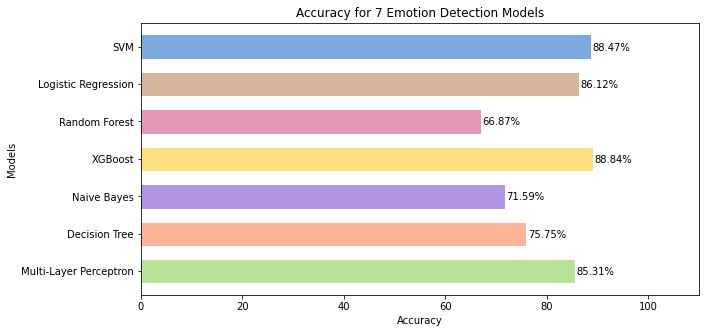

In [ ]:
# algorithms = ['SVM','Logistic Regression','Random Forest','XGBoost','Naive Bayes','Decision Tree','Multi-Layer Perceptron']
# algorithm_acc = [svm_acc*100, lr_acc*100, rfc_acc*100, xgbc_acc*100, mnb_acc*100, dt_acc*100, mlp_acc*100]

algorithms = ['Multi-Layer Perceptron','Decision Tree','Naive Bayes','XGBoost','Random Forest','Logistic Regression','SVM']
algorithm_acc = [mlp_acc*100, dt_acc*100, mnb_acc*100, xgbc_acc*100, rfc_acc*100, lr_acc*100, svm_acc*100]
# Figure Size
fig = plt.figure(figsize =(10, 5))
bar_list = plt.barh(algorithms, algorithm_acc,height = 0.6,color='black')
bar_list[6].set_color('#7CAADE')
bar_list[5].set_color('#D5B59C')
bar_list[4].set_color('#E396B6')
bar_list[3].set_color('#FFDF80')
bar_list[2].set_color('#B096E3')
bar_list[1].set_color('#FFB49C')
bar_list[0].set_color('#B9E396')
plt.xlabel('Accuracy',color='black')
plt.ylabel('Models',color='black')
plt.title('Accuracy for 7 Emotion Detection Models')
plt.xlim(0,110)

for i, v in enumerate(algorithm_acc):
    plt.text(v + 0.5, i - 0.1, str(round(v,2))+'%', color='black',fontsize=10)
    
plt.show()

## Save all Models in Disk

In [ ]:
with open(root_path+'/Models/Emotion Detection Models_7 models.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([svm, logisticRegr, rfc, xgbc, mnb, dt, mlp], f)

## Load All Models From Disk

In [ ]:
if os.path.isfile(root_path+'/Models/Emotion Detection Models_7 models.pkl'):
    # Getting back the objects:
    with open(root_path+'/Models/Emotion Detection Models.pkl','rb') as f:  # Python 3: open(..., 'rb')
        svm, logisticRegr, rfc, xgbc, mnb, dt, mlp = pickle.load(f)
        print('File Loaded Successfully')
else:
    print('File not Found')

File Loaded Successfully


# 6. Prediction

In [ ]:
emotion_model_weight = [0.3, 0.2 , 0.03, 0.3, 0.07, 0.1]    #SVM, Logistic Regression, RF, XGB, NB, DT
def extract_best_emotion(list_emotion_pred):
    emotion_scores = {}
    for emotions in Emotions:
        emotion_scores[emotions] = 0.0   
    for i in range(len(list_emotion_pred)):
        emotion_scores[list_emotion_pred[i]] += emotion_model_weight[i]
    se = sorted(emotion_scores.items(), key = lambda pair:pair[1],reverse=True)
    return se[0][0], round(se[0][1],2)

In [ ]:
while True:
    input_str = input("What's in your mind: ")
    if input_str == 'nothing':
        break
        
    processed_text = tfidf_transformer_xtest.fit_transform(countVectorizer1.transform([input_str]))

    svm_emotion = svm.predict(processed_text)[0]
    lr_emotion = logisticRegr.predict(processed_text)[0]
    dt_emotion = dt.predict(processed_text)[0]
    mnb_emotion = mnb.predict(processed_text)[0]
    xgbc_emotion = xgbc.predict(processed_text)[0]
    rfc_emotion = rfc.predict(processed_text)[0]

    list_emotion_pred = [svm_emotion, lr_emotion, rfc_emotion, xgbc_emotion, mnb_emotion, dt_emotion]
    best_emotion, prob = extract_best_emotion(list_emotion_pred)
    print('Best Emotion:',best_emotion,':',prob)

    print('Emotion using SVM: ',end = '')
    print(svm.predict(processed_text))
    print('Emotion using Logistic Regression: ',end = '')
    print(logisticRegr.predict(processed_text))
    print('Emotion using Decision Tree: ',end = '')
    print(dt.predict(processed_text))
    print('Emotion using Naive Bayes: ',end = '')
    print(mnb.predict(processed_text))
    print('Emotion using XGBoost: ',end = '')
    print(xgbc.predict(processed_text))
    print('Emotion using Random Forest: ',end = '')
    print(rfc.predict(processed_text))
    print()

What's in your mind: hello
Best Emotion:  Neutral : 1.0
Emotion using SVM: [' Neutral']
Emotion using Logistic Regression: [' Neutral']
Emotion using Decision Tree: [' Neutral']
Emotion using Naive Bayes: [' Neutral']
Emotion using XGBoost: [' Neutral']
Emotion using Random Forest: [' Neutral']

What's in your mind: how are you?
Best Emotion:  Neutral : 0.73
Emotion using SVM: [' Neutral']
Emotion using Logistic Regression: ['joy']
Emotion using Decision Tree: [' Neutral']
Emotion using Naive Bayes: ['joy']
Emotion using XGBoost: [' Neutral']
Emotion using Random Forest: [' Neutral']

What's in your mind: here you are
Best Emotion:  Neutral : 0.73
Emotion using SVM: [' Neutral']
Emotion using Logistic Regression: ['joy']
Emotion using Decision Tree: [' Neutral']
Emotion using Naive Bayes: ['joy']
Emotion using XGBoost: [' Neutral']
Emotion using Random Forest: [' Neutral']

What's in your mind: successfully worked
Best Emotion: joy : 0.57
Emotion using SVM: ['joy']
Emotion using Logist

## Predicting emotion of chatbot Dataset

In [ ]:
df_chatbot = pd.read_csv(root_path+'Chatbot Dataset.csv',encoding='ISO-8859-1')
df_chatbot = df_chatbot.dropna(axis=0)
user_chat = df_chatbot['User'].tolist()
chatbot_reply = df_chatbot['Chatbot'].tolist()
chatbot_intent = df_chatbot['Intent'].tolist()
len(user_chat)

596

In [ ]:
import csv
def save_data_csv(all_data_rows):
    count = 0
    with open(root_path+'Chatbot Dataset with Emotion.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        for row_data in all_data_rows:
            writer.writerow(row_data)
            count+=1
    return count-1

In [ ]:
all_data_rows = []
all_data_rows.append(['User','Chatbot','Intent','Emotion','Probability'])

for i in range(len(user_chat)):
    input_str = user_chat[i]
    reply = chatbot_reply[i]
    intent = chatbot_intent[i]
    processed_text = tfidf_transformer_xtest.fit_transform(countVectorizer1.transform([input_str]))

    svm_emotion = svm.predict(processed_text)[0]
    lr_emotion = logisticRegr.predict(processed_text)[0]
    dt_emotion = dt.predict(processed_text)[0]
    mnb_emotion = mnb.predict(processed_text)[0]
    xgbc_emotion = xgbc.predict(processed_text)[0]
    rfc_emotion = rfc.predict(processed_text)[0]

    list_emotion_pred = [svm_emotion, lr_emotion, rfc_emotion, xgbc_emotion, mnb_emotion, dt_emotion]
    best_emotion, prob = extract_best_emotion(list_emotion_pred)

    row = [input_str, reply, intent, best_emotion, prob]
    all_data_rows.append(row)

print(save_data_csv(all_data_rows),'data saved into file')

596 data saved into file
